<a href="https://colab.research.google.com/github/Skommireddy/Projects-IDS/blob/main/HW4/problem1_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: *Identifying the data source, collecting the data from GitHub, analyzing the data set in R by creating contingency tables, plotting the graphs, determining the outliers and Standardize (zero mean) the variables.*

The import pandas is used to bring the pandas data analysis library into the current environment. The as pd is used to give pandas the alias of pd. This allows you to use pandas functions by simply typing pd.

In [136]:
# importing pandas library for quantitative data analysis
import pandas as pd

Importing csv file from **Github repositiory** HW4 folder.
Printing the imported data set adult_trainingDF.

In [137]:
# Importing adult_training.csv file from Github using Pandas library
adult_trainingDF  = pd.read_csv("https://raw.githubusercontent.com/Skommireddy/Projects-IDS/main/HW4/adult_training.csv");
adult_trainingDF

,age,workclass,education,marital_status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


Contingency table of workclass and sex to understand the correlation between work class and sex variables.

In [138]:
# Cross tabulation of workclass and sex
p_crosstab = pd.crosstab(adult_trainingDF.workclass, adult_trainingDF.sex)
# display cross tabulation
print(p_crosstab)

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


Ploting the Contingency table of workclass and sex using barplot.




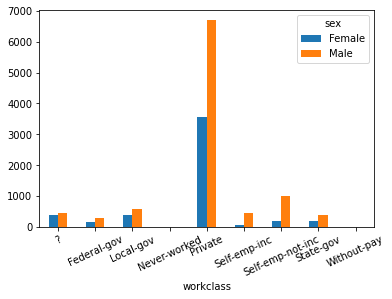

In [139]:
# Creating barplot
# x label rotation
barplot = p_crosstab.plot.bar(rot=25)

Contingency table of sex and marital status to understand the correlation between sex and marital_status variables.

In [140]:
# Cross tabulation of sex and marital_status
a_crosstab = pd.crosstab(adult_trainingDF.sex, adult_trainingDF.marital_status)
# print cross tabulation
print(a_crosstab)

marital_status  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                               
Female              1219                  7                 761   
Male                 795                  4                6010   

marital_status  Married-spouse-absent  Never-married  Separated  Widowed  
sex                                                                       
Female                             95           2160        290      380  
Male                              104           2717        182       73  


Plotting the contingency table of sex and marital status using barplot.

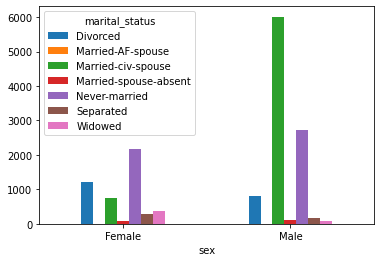

In [141]:
# Creating barplot

# x label rotation
barplot = a_crosstab.plot.bar(rot=0)

Create a new data frame adultOver40, for those whose age > 40

In [142]:
# creating new dataframe for age>40 from adult_trainingDF
adultOver40DF = adult_trainingDF[adult_trainingDF['age']>40]
# print new dataframe
adultOver40DF

,age,workclass,education,marital_status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K



Contingency table of sex and marital status for adultOver40.

In [143]:
# Cross tabulation of sex and marital_status for adultOver40
a_crosstab = pd.crosstab(adultOver40DF.sex, adultOver40DF.marital_status)
# print cross tabulation
print(a_crosstab)

marital_status  Divorced  Married-civ-spouse  Married-spouse-absent  \
sex                                                                   
Female               720                 305                     38   
Male                 448                3383                     47   

marital_status  Never-married  Separated  Widowed  
sex                                                
Female                    256        133      354  
Male                      315         74       71  


Plotting the Contingency table of sex and marital status for adultOver40.

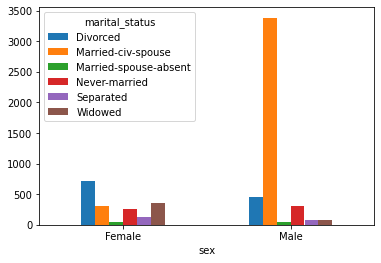

In [144]:
# Creating barplot

# x label rotation
barplot = a_crosstab.plot.bar(rot=0)

Determine whether any outliers exist for the education field.

*   Outliers exist for education variable. 
*   Values below 4 are outliers.
*   There are 14528 outliers.

In [145]:
# Recall we standard-scaled column 'education' before
adult_trainingDF['education'].describe()

count    14797.000000
mean        10.068798
std          2.598297
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education, dtype: float64

Using Three sigma Rule to determine the outliers for education field.

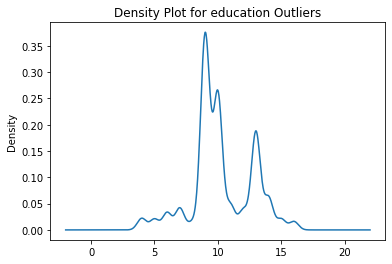

In [146]:
# Determine the outliers using the three sigma rule for the education attribute
# import matplot library
import matplotlib.pyplot as plt
adult_trainingDF_outliers = adult_trainingDF.query('(education > 3 | education < -3)')['education']
# density plot for distribution of education variable
adult_trainingDF_outliers.plot.density()
plt.title('Density Plot for education Outliers')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


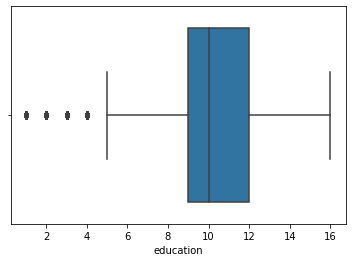

In [147]:
# Box Plot
import seaborn as sns
sns.boxplot(adult_trainingDF['education'])

Standardize (zero mean) the age variable, and identify how many outliers 
there are. What is the most extreme outlier?


*   There are 60 outliers in age variable.
*   From the box plot, age 90 is the most extreme outlier.



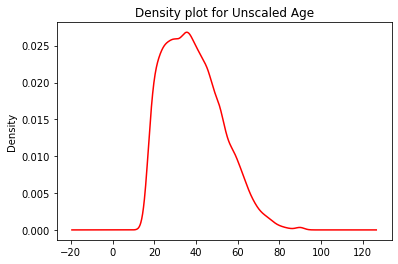

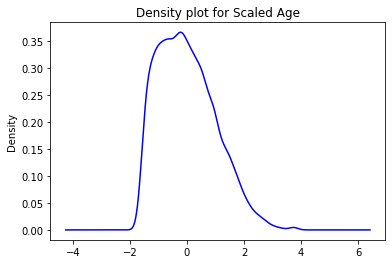

In [148]:
# Standardize (zero mean)
from scipy import stats
# importing matplotlib library for creating static, animated, 
# and interactive visualizations in Python
import matplotlib.pyplot as plt
adult_trainingDF['scaled_age'] = stats.zscore(adult_trainingDF.age, nan_policy='omit')
adult_trainingDF.age.plot.density(color="red")
plt.title('Density plot for Unscaled Age')
plt.show()
adult_trainingDF.scaled_age.plot.density(color="blue")
plt.title('Density plot for Scaled Age')
plt.show()

In [149]:
# Recall we standard-scaled column 'age' before
adult_trainingDF['scaled_age'].describe()

count    1.479700e+04
mean     5.678291e-17
std      1.000034e+00
min     -1.585523e+00
25%     -7.813360e-01
50%     -1.233649e-01
75%      6.808219e-01
max      3.751354e+00
Name: scaled_age, dtype: float64

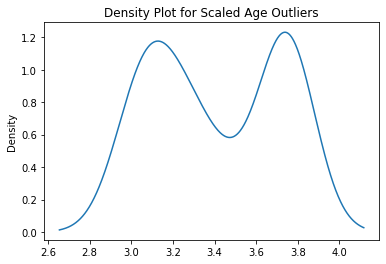

In [150]:
# Determine the outliers using the three sigma rule for the scaled_age attribute

adult_trainingDF_outliers = adult_trainingDF.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']
# density plot of outliers for age variable
adult_trainingDF_outliers.plot.density()
plt.title('Density Plot for Scaled Age Outliers')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


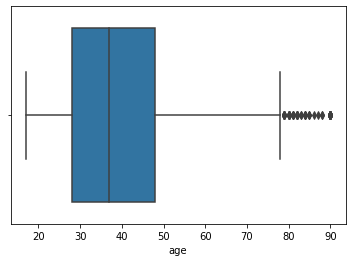

In [151]:
# Box Plot
import seaborn as sns
sns.boxplot(adult_trainingDF['age'])

Age anomaly? Select only records with age  at least 80. Explain what you see.
*   From the histogram below there are more adults with age 89,90 among all the adults with age atleast 80.



In [152]:
#creating new dataframe for age>=80 from adult_trainingDF
adultAtleast80DF = adult_trainingDF[adult_trainingDF['age']>=80]
#print new data frame
adultAtleast80DF

,age,workclass,education,marital_status,occupation,sex,capital-gain,capital-loss,income,scaled_age
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,3.751354
204,80,?,9,Widowed,?,Male,0,0,<=50K,3.020275
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K,3.751354
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,3.605138
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,3.751354
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K,3.751354
1485,82,?,4,Widowed,?,Male,0,0,<=50K,3.166491
2420,90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K,3.751354
2430,80,Private,14,Widowed,Prof-specialty,Female,0,0,<=50K,3.020275
2467,90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K,3.751354


Construct a histogram of age.

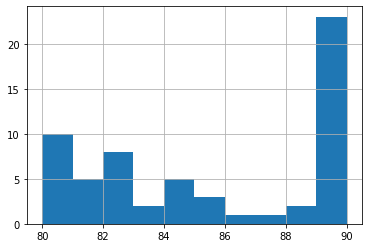

In [153]:
#generating the histogram for age. 
adultAtleast80DF.age.hist()